# Pima Indians Diabetes

**DATASET LINK** https://www.kaggle.com/uciml/pima-indians-diabetes-database

Dataset include health information of female patients (from 21 years old and above) in India.



## Target

The Target is to design Decision Tree, Support Vector Machine and Deep Neural Network to predict whether they would be diabetes or not based on their health information and compare their performance by metrics and Confusion Matrix.

## Features in the dataset

Feature | Description
--------|------------
Pregnancies | Number of times pregnant
Glucose | Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure | Diastolic blood pressure (mm Hg)
SkinThickness | Triceps skin fold thickness (mm)
Insulin | 2-Hour serum insulin (mu U/ml)
BMI | Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction | Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age | Age (years)
**Outcome** | Label **0 if non-diabetic, 1 if diabetic**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.random import set_seed
set_seed(1612)
import numpy as np
np.random.seed(1612)

In [ ]:
import warnings
import sys
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Style for chart
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')

In [ ]:
PATH = '/content/drive/My Drive/Colab Notebooks/Projects/Pima Indians Diabetes Database/diabetes.csv'

df = pd.read_csv(PATH)

## Data Exploration

### Print out the 1st random 10 rows

In [ ]:
df.sample(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
560,6,125,76,0,0,33.8,0.121,54,1
377,1,87,60,37,75,37.2,0.509,22,0
542,10,90,85,32,0,34.9,0.825,56,1
203,2,99,70,16,44,20.4,0.235,27,0
151,4,114,65,0,0,21.9,0.432,37,0
675,6,195,70,0,0,30.9,0.328,31,1
438,1,97,70,15,0,18.2,0.147,21,0
306,10,161,68,23,132,25.5,0.326,47,1
598,1,173,74,0,0,36.8,0.088,38,1
59,0,105,64,41,142,41.5,0.173,22,0


### Print out the data's statistical information

In [ ]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



### Print out data type of features to know which feature's type is object


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check null (na or nan)

In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


### Most of the data features have **continuous value**. The only 2 columns having **categorical value** are Pregnancies and Outcome.


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Print out number of unique values of 2 columns: Pregnancies and Outcome

In [ ]:
print('Pregnancies unique values: ', df.Pregnancies.unique())
print('Outcome unique values: ', df.Outcome.unique())

Pregnancies unique values:  [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Outcome unique values:  [1 0]


## Data Visualization

### Count plot for Outcome, Pregnancy


*   CountPlot to count labels 0, 1 in the column Outcome
*   CountPlot to count times of Pregnancy
*   Countplot to combine times of Pregnancy and Outcome

Text(0.5, 1.0, 'Outcome vs Pregnancies')

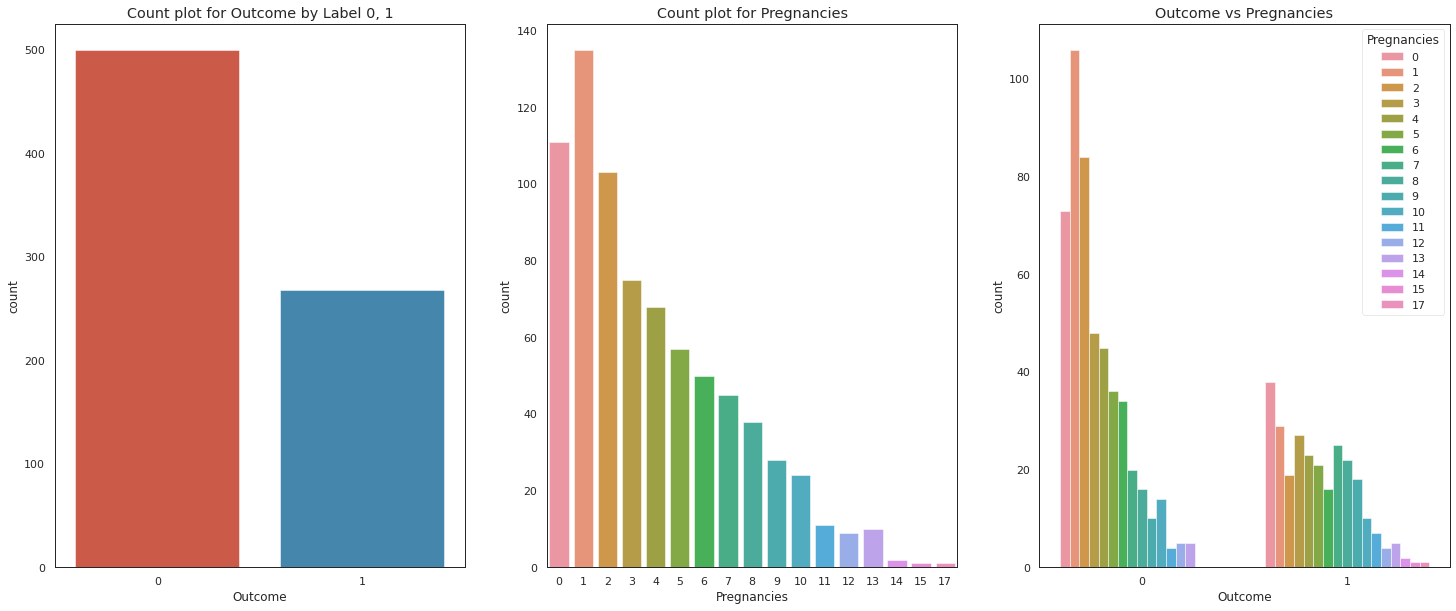

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.countplot(df.Outcome) 
plt.title('Count plot for Outcome by Label 0, 1')

plt.subplot(1,3,2)
sns.countplot(df.Pregnancies)
plt.title('Count plot for Pregnancies')

plt.subplot(1,3,3)
sns.countplot(x="Outcome", hue="Pregnancies", data=df)
plt.title('Outcome vs Pregnancies')

# plt.subplot(2,3,4)
# ax= sns.boxplot(parameter orient = 'h', data=df)
# plt.show()

### Boxplot

*   BoxPlot for all features in the dataframe (Use parameter orient = 'h' to draw a horizontal boxplot)

Text(0.5, 1.0, 'Box plot for Outcome')

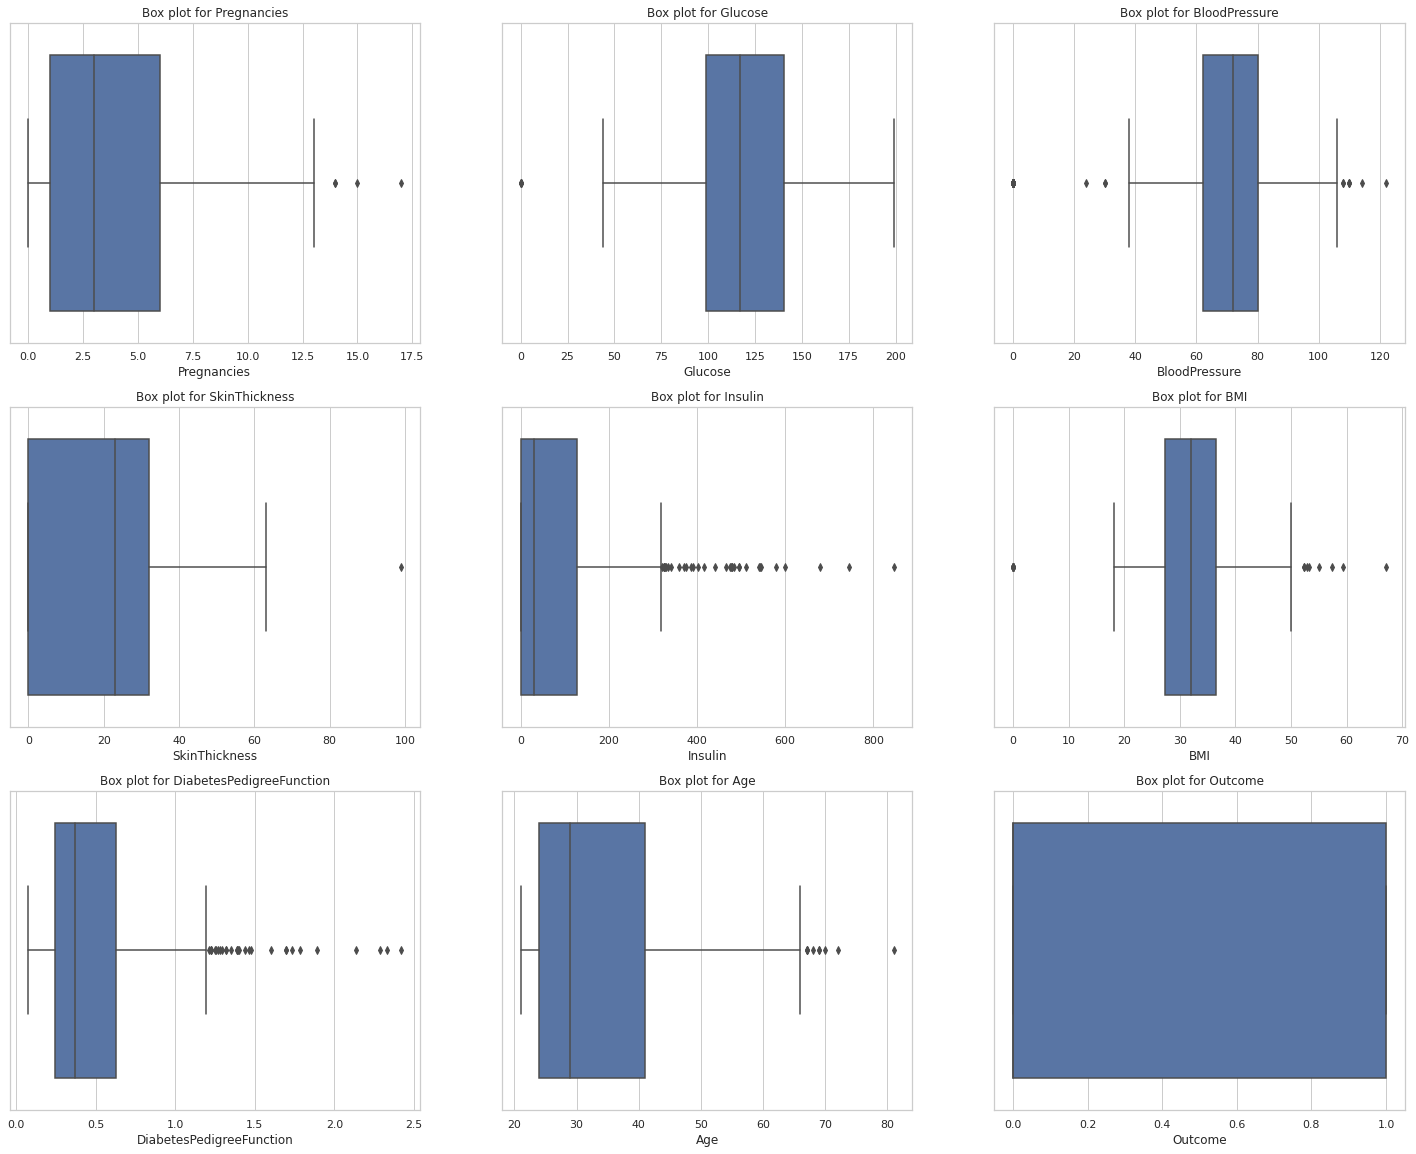

In [ ]:
# Method 1:
plt.figure(figsize=(25,20))
sns.set(style="whitegrid")

plt.subplot(3,3,1)
ax = sns.boxplot(x=df["Pregnancies"], orient='h')
plt.title('Box plot for Pregnancies')

plt.subplot(3,3,2)
ax = sns.boxplot(x=df["Glucose"], orient='h')
plt.title('Box plot for Glucose')

plt.subplot(3,3,3)
ax = sns.boxplot(x=df["BloodPressure"], orient='h')
plt.title('Box plot for BloodPressure')

plt.subplot(3,3,4)
ax = sns.boxplot(x=df["SkinThickness"], orient='h')
plt.title('Box plot for SkinThickness')

plt.subplot(3,3,5)
ax = sns.boxplot(x=df["Insulin"], orient='h')
plt.title('Box plot for Insulin')

plt.subplot(3,3,6)
ax = sns.boxplot(x=df["BMI"], orient='h')
plt.title('Box plot for BMI')

plt.subplot(3,3,7)
ax = sns.boxplot(x=df["DiabetesPedigreeFunction"], orient='h')
plt.title('Box plot for DiabetesPedigreeFunction')

plt.subplot(3,3,8)
ax = sns.boxplot(x=df["Age"], orient='h')
plt.title('Box plot for Age')

plt.subplot(3,3,9)
ax = sns.boxplot(x=df["Outcome"], orient='h')
plt.title('Box plot for Outcome')

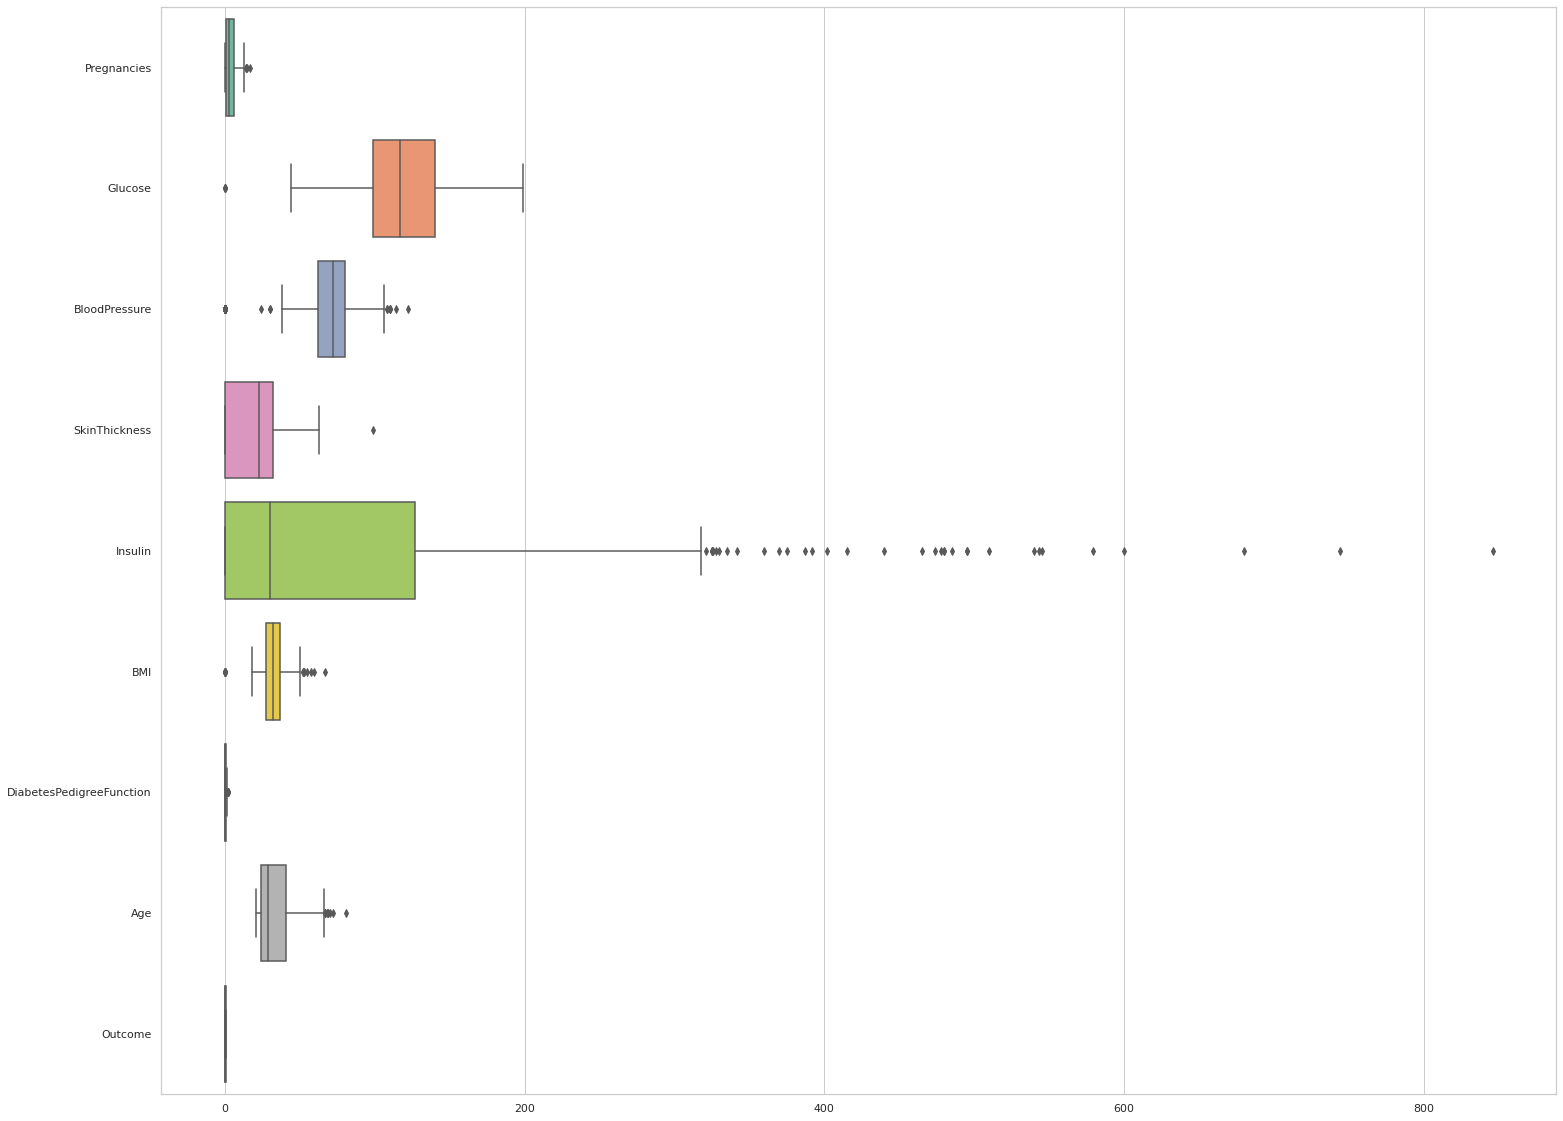

In [ ]:
# Method 2:
plt.figure(figsize=(25,20))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, orient="h", palette="Set2")

### Histogram

*   Histogram for all features in the dataframe

<Figure size 432x288 with 0 Axes>

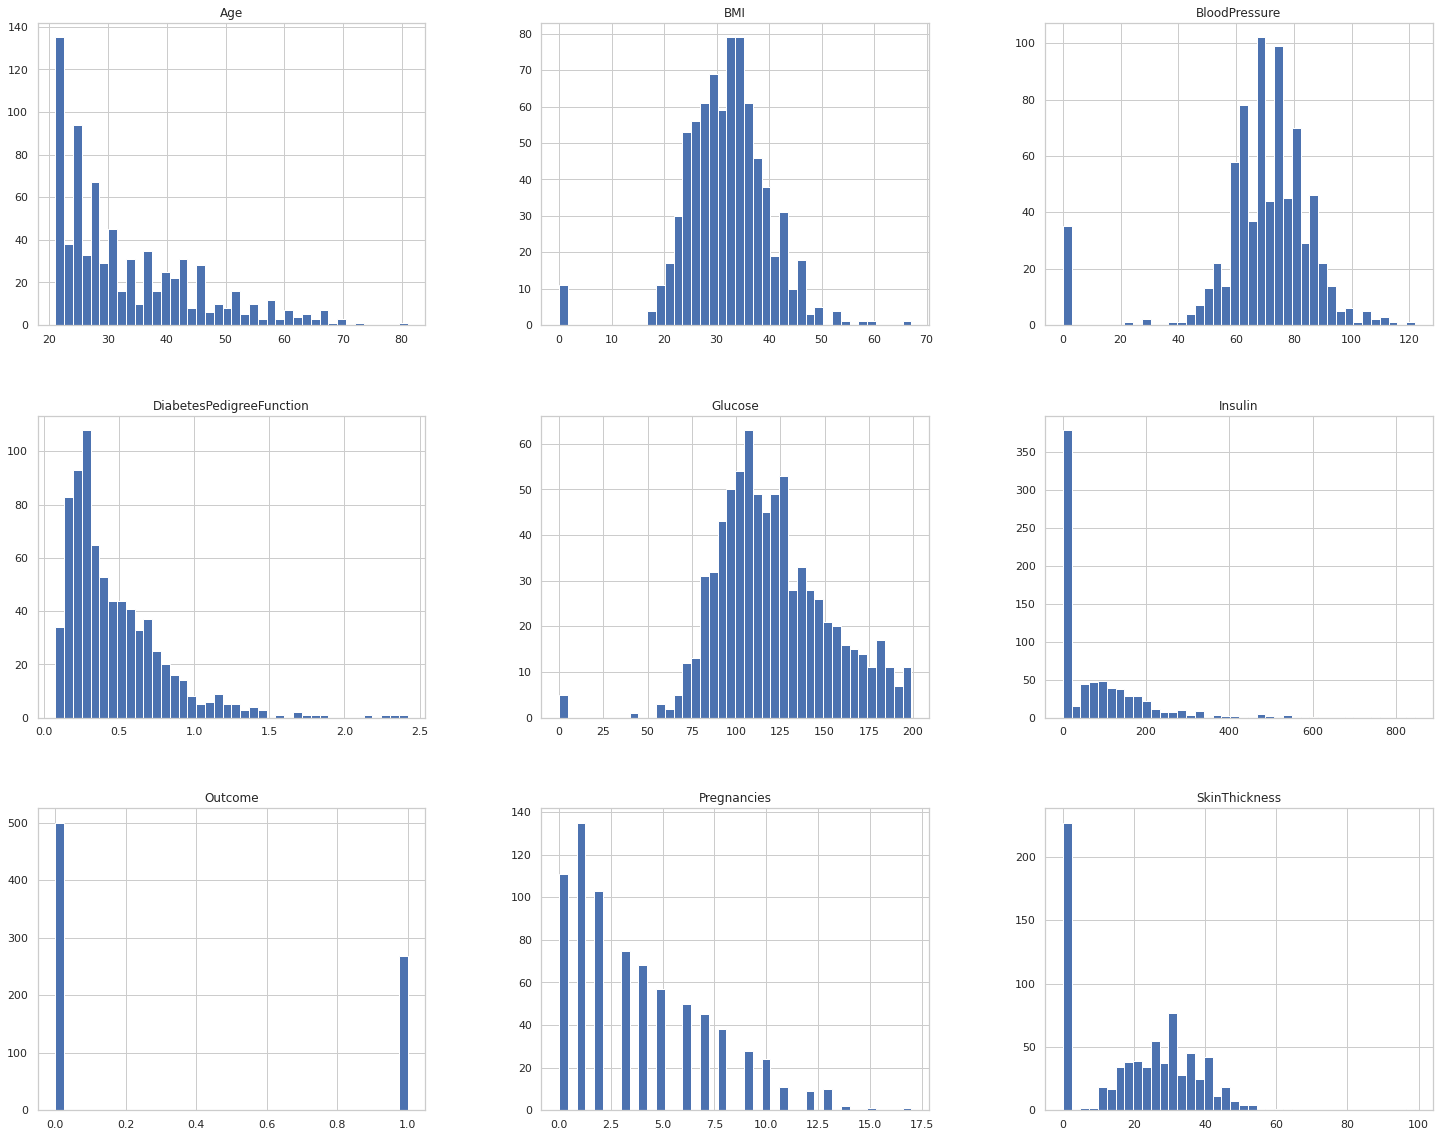

<Figure size 432x288 with 0 Axes>

In [ ]:
df.hist(figsize=(25,20),bins=40)
plt.figure()

### Heatmap

*   Heatmap for Correlation Matrix

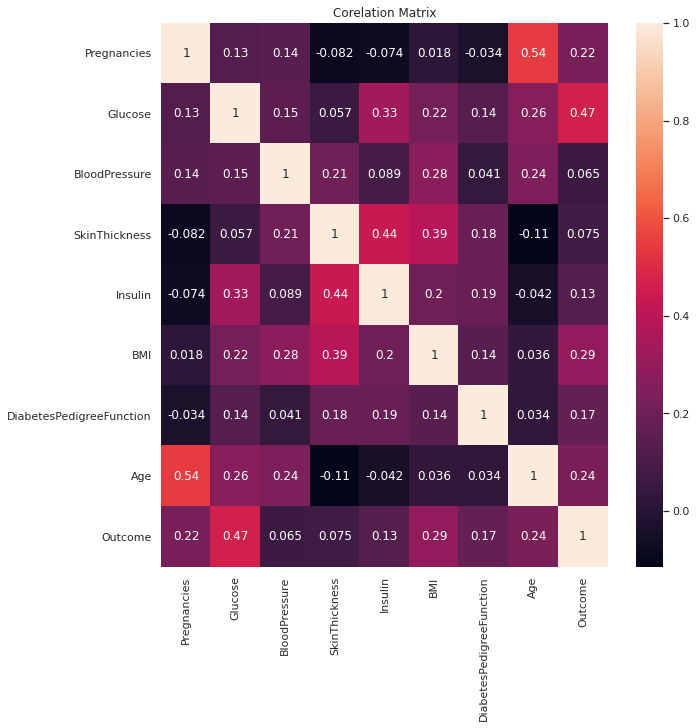

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True) # corr() only used for DataFrame
plt.title('Corelation Matrix');

## Data Preprocessing

### Observing the Histogram, there are many anamolies in the dataset.

* The features **`Insulin, SkinTickness, BloodPressure, BMI, Glucose`** has many values equal to 0. In these features, value = 0 means that those data points are null (nan / na).

So, I will replace these values by their median value.

Replacing nan values can be done by choosing a Feature with a Categorical type and the highest Correlation, then caculating its Median of data points grouped by that Feature.

However, in this dataset, most of the Features are Continuous types, so I will replace them by Medians of all columns.

For example: I will use the Median valye of all values in BMI to replace its values = 0.

### Replace null value of BMI by its median value

In [ ]:
# Calculate the median value for BMI
median_bmi = df['BMI'].median()
# Replace it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=median_bmi)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(df.shape)

(768, 9)




### Replace all value = 0 of other features **`Insulin, SkinThickness, BloodPressure, Glucose`**




In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
median_insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(
    to_replace=0, value=median_insulin)

In [ ]:
median_skinthickness = df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(
    to_replace=0, value=median_skinthickness)

In [ ]:
median_bloodpressure = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(
    to_replace=0, value=median_bloodpressure)

In [ ]:
median_glucose = df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(
    to_replace=0, value=median_glucose)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


### Draw a Boxplot again after the replacement to see any changes

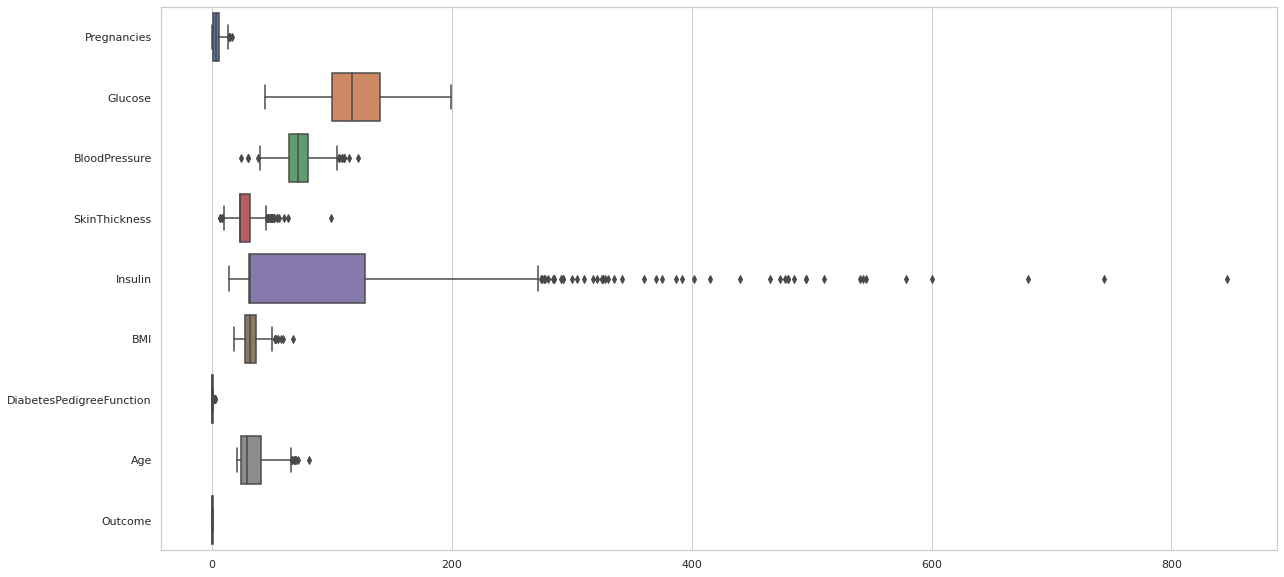

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient = 'h',)

### Conclusion for Insulin

1. Insulin has no low-outlier values.

2. Values greater than 273 are outliers.

### Calculate q1, q3, min, max of Insulin

In [ ]:
q1_insulin = np.quantile(df['Insulin'], 0.25, interpolation='midpoint')
q3_insulin = np.quantile(df['Insulin'], 0.75, interpolation='midpoint')
iqr_insulin = q3_insulin - q1_insulin
max_insulin = q3_insulin + 1.5 * iqr_insulin
min_insulin = q1_insulin - 1.5 * iqr_insulin
min_insulin, max_insulin

(-115.0, 273.0)

### Calculate q1, q3, min, max of other features (except Outcome) and Conclude about their outliers

Glucose has no low-outlier or high-outlier.

In [ ]:
q1_glucose = np.quantile(df['Glucose'], 0.25, interpolation='midpoint')
q3_glucose = np.quantile(df['Glucose'], 0.75, interpolation='midpoint')
iqr_glucose = q3_glucose - q1_glucose
max_glucose = q3_glucose + 1.5 * iqr_glucose
min_glucose = q1_glucose - 1.5 * iqr_glucose
min_glucose, max_glucose

(38.0, 202.0)

Pregnancies has no low-outlier. Values greater than 13.5 are outliers.

In [ ]:
q1_pregnancies = np.quantile(df['Pregnancies'], 0.25, interpolation='midpoint')
q3_pregnancies = np.quantile(df['Pregnancies'], 0.75, interpolation='midpoint')
iqr_pregnancies = q3_pregnancies - q1_pregnancies
max_pregnancies = q3_pregnancies + 1.5 * iqr_pregnancies
min_pregnancies = q1_pregnancies - 1.5 * iqr_pregnancies
min_pregnancies, max_pregnancies

(-6.5, 13.5)

BloodPressure's values less than 40.0 and greater than 104.0 are outliers.

In [ ]:
q1_bloodpressure = np.quantile(df['BloodPressure'], 0.25, interpolation='midpoint')
q3_bloodpressure = np.quantile(df['BloodPressure'], 0.75, interpolation='midpoint')
iqr_bloodpressure = q3_bloodpressure - q1_bloodpressure
max_bloodpressure = q3_bloodpressure + 1.5 * iqr_bloodpressure
min_bloodpressure = q1_bloodpressure - 1.5 * iqr_bloodpressure
min_bloodpressure, max_bloodpressure

(40.0, 104.0)

SkinThickness's values less than 9.5 and greater than 45.5 are outliers.

In [ ]:
q1_skinthickness = np.quantile(df['SkinThickness'], 0.25, interpolation='midpoint')
q3_skinthickness = np.quantile(df['SkinThickness'], 0.75, interpolation='midpoint')
iqr_skinthickness = q3_skinthickness - q1_skinthickness
max_skinthickness = q3_skinthickness + 1.5 * iqr_skinthickness
min_skinthickness = q1_skinthickness - 1.5 * iqr_skinthickness
min_skinthickness, max_skinthickness

(9.5, 45.5)

BMI has no low-outlier. Values greater than 50.25 are outliers.

In [ ]:
q1_bmi = np.quantile(df['BMI'], 0.25, interpolation='midpoint')
q3_bmi = np.quantile(df['BMI'], 0.75, interpolation='midpoint')
iqr_bmi = q3_bmi - q1_bmi
max_bmi = q3_bmi + 1.5 * iqr_bmi
min_bmi = q1_bmi - 1.5 * iqr_bmi
min_bmi, max_bmi

(13.849999999999998, 50.25)

DiabetesPedigreeFunction has no low-outlier. Values greater than 1.201 are outliers.

In [ ]:
q1_dpf = np.quantile(df['DiabetesPedigreeFunction'], 0.25, interpolation='midpoint')
q3_dpf = np.quantile(df['DiabetesPedigreeFunction'], 0.75, interpolation='midpoint')
iqr_dpf = q3_dpf - q1_dpf
max_dpf = q3_dpf + 1.5 * iqr_dpf
min_dpf = q1_dpf - 1.5 * iqr_dpf
min_dpf, max_dpf

(-0.3310000000000001, 1.201)

Age has no low-outlier. Value greater than 66.5 are outliers.

In [ ]:
q1_age = np.quantile(df['Age'], 0.25, interpolation='midpoint')
q3_age = np.quantile(df['Age'], 0.75, interpolation='midpoint')
iqr_age = q3_age - q1_age
max_age = q3_age + 1.5 * iqr_age
min_age = q1_age - 1.5 * iqr_age
min_age, max_age

(-1.5, 66.5)

## Feature Scaling & Prepare Dataset

* Split data into Train and Test Set
  * Test size = 0.3, randomstate = 1612, stratify = y
* Apply StandardScaler

In [ ]:
y = df.Outcome
df = df.drop(columns=['Outcome'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, stratify=y, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

Shape of X train (537, 8)
Shape of y train (537,)
Shape of X test (231, 8)
Shape of y test (231,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Train and Evaluate Classification Model

* Use SkLearn to create and train models: Support Vector Machine & Decision Tree

* Use Keras to create and train a model of Deep Neural Network

* After training, I will evaluate model performance by accuracy on 2 sets: Train and Test

* Draw Heat map - Confusion Matrix for each model

* Conclude which is the best model and why so

### Support Vector Machine

#### Hyper-parameters

In [ ]:
C_values = [0.01, 0.1, 1] # from 0.01 to 1
gamma_values = [0.01, 0.1, 1]
kernel_values = ['linear', 'poly', 'rbf']

param_grid = {
    'kernel': kernel_values,
    'C': C_values,
    'gamma': gamma_values
}

#### GridSearch

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=1612)
grid = GridSearchCV(model, param_grid, cv=2)
grid.fit(X_train_scale, y_train)

svc = grid.best_estimator_

#### Metric scores

In [ ]:
print('Accuracy score on Train Set:', str(svc.score(X_train_scale, y_train)))
print('Accuracy score on Test Set:', str(svc.score(X_test_scale, y_test)))

Accuracy score on Train Set: 0.776536312849162
Accuracy score on Test Set: 0.7792207792207793


#### Confusion Matrix

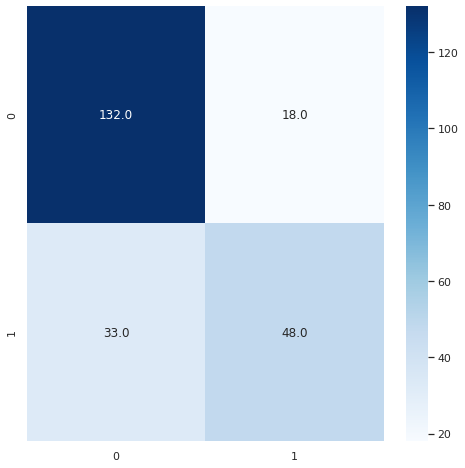

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
y_pred = svc.predict(X_test_scale)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='.1f')

### Decision Tree

#### Hyper-parameters

In [ ]:
params = {
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,7],
    'min_samples_split': np.linspace(0.1, 1.0, 10), 
    'max_features':  ['auto', 'log2']
}
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1612)
decision_tree.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1612, splitter='best')

#### Metric scores

In [ ]:
print('Accuracy on Train Set: ', decision_tree.score(X_train_scale, y_train))
print('Accuracy on Test Set: ', decision_tree.score(X_test_scale, y_test))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.7186147186147186


#### Confusion Matrix

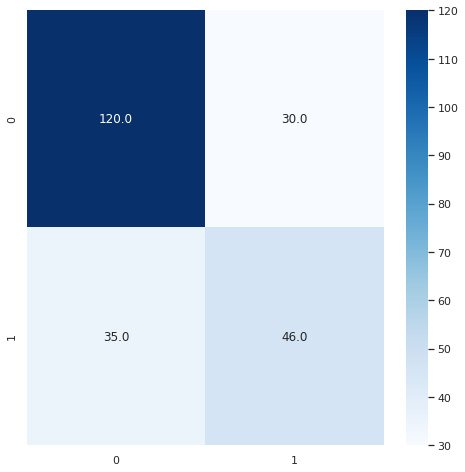

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
y_pred = decision_tree.predict(X_test_scale)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='.1f')

### Deep Neural Network

#### Check shape

In [ ]:
print(X_train.shape[1:])

(8,)


In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

print('Shape of X_train_scale:', X_train_scale.shape)
print('Shape of X_test_scale:', X_test_scale.shape)

Shape of X_train: (537, 8)
Shape of y_train: (537,)
Shape of X_test: (231, 8)
Shape of y_test: (231,)
Shape of X_train_scale: (537, 8)
Shape of X_test_scale: (231, 8)


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [ ]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
758            1      106             76  ...  37.5                     0.197   26
140            3      128             78  ...  21.1                     0.268   55
605            1      124             60  ...  35.8                     0.514   21
372            0       84             64  ...  35.8                     0.545   21
265            5       96             74  ...  33.6                     0.997   43
..           ...      ...            ...  ...   ...                       ...  ...
594            6      123             72  ...  33.6                     0.733   34
429            1       95             82  ...  35.0                     0.233   43
213            0      140             65  ...  42.6                     0.431   24
345            8      126             88  ...  38.5                     0.349   49
509            8      120             78  ...  25.0                     0.409   64

[53

In [ ]:
print(X_train_scale)

[[-0.88675351 -0.5294551   0.28251054 ...  0.75842135 -0.80598117
  -0.63479476]
 [-0.28702223  0.21973433  0.44995884 ... -1.6575756  -0.58664195
   1.85153795]
 [-0.88675351  0.08351807 -1.05707586 ...  0.50798264  0.17332211
  -1.06347282]
 ...
 [-1.18661914  0.62838311 -0.63845511 ...  1.50973748 -0.08308853
  -0.80626599]
 [ 1.21230596  0.1516262   1.28720034 ...  0.90573824 -0.33640988
   1.33712428]
 [ 1.21230596 -0.05269819  0.44995884 ... -1.08303974 -0.15105279
   2.62315844]]


#### Import libraries

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

#### Compile the DNN model

In [ ]:
loss = []
acc = [] 
model = Sequential()
model.add(Dense(64, activation='relu', name='hidden_layer_1', input_shape=X_train_scale.shape[1:]))
model.add(Dense(64, activation='relu', name='hidden_layer_2', input_shape=X_train_scale.shape[1:]))
model.add(Dense(64, activation='relu', name='hidden_layer_3', input_shape=X_train_scale.shape[1:]))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 64)                576       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                4160      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [ ]:
def train_model(model, epochs):
  history = model.fit(X_train_scale, y_train, epochs=epochs, verbose=0)
  print(model.evaluate(X_train_scale, y_train))  
  loss.extend(history.history['loss'])
  acc.extend(history.history['accuracy'])

#### Draw charts of Accuracy and Loss versus Epochs

In [ ]:
def draw_chart(loss, acc):
  epochs = range(len(loss))

  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, c='red')
  plt.title('Loss versus Epochs')

  plt.subplot(1,2,2)
  plt.plot(epochs, acc)
  plt.title('Accuracy versus Epochs')

17/17 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
[0.0012705079279839993, 1.0]


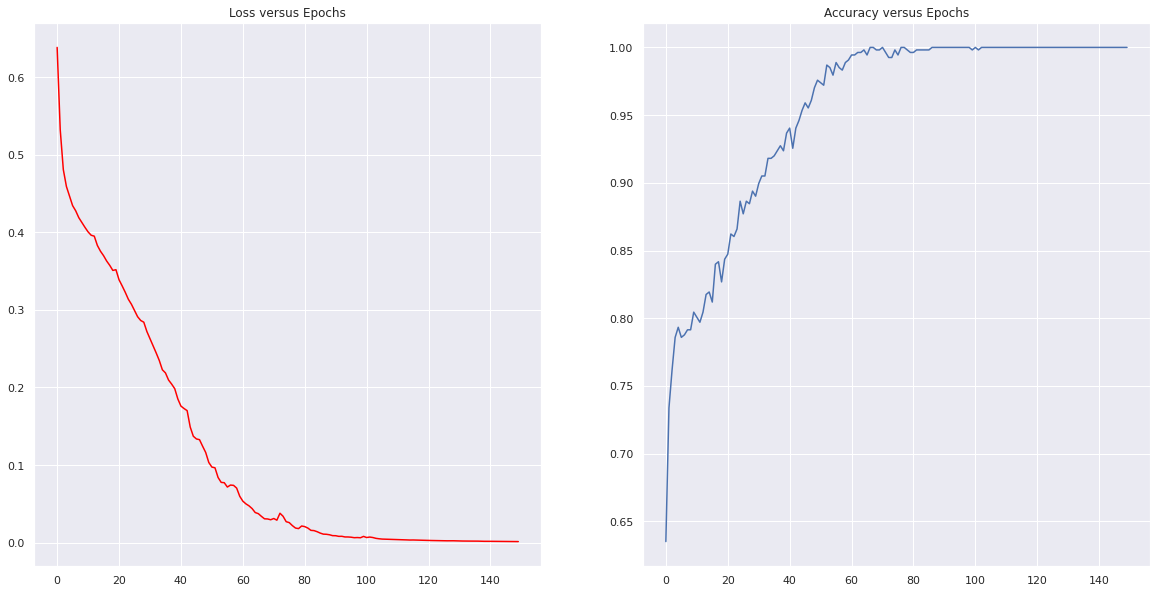

In [ ]:
train_model(model, epochs=150)
draw_chart(loss, acc)

#### Evaluate the model

In [ ]:
model.evaluate(X_train_scale, y_train)
model.evaluate(X_test_scale, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 2.1307 - accuracy: 0.7056


[2.130713939666748, 0.7056276798248291]

#### Confusion Matrix

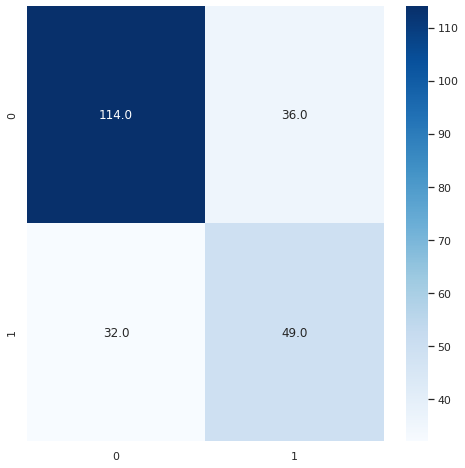

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_pred = model.predict(X_test_scale)
y_pred = np.where(y_pred >= 0.5, 1, 0) # sigmoid returns range 0-1 so use np.where to return 0 & 1
#y_pred = np.argmax(y_pred, axis=1) # np.argmax used for multi-class classification
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues')

### Confusion Matrices for 3 Models: Support Vector Machine, DecisionTree, Deep Neural Network

Text(0.5, 1.0, 'Confusion Matrix for DNN')

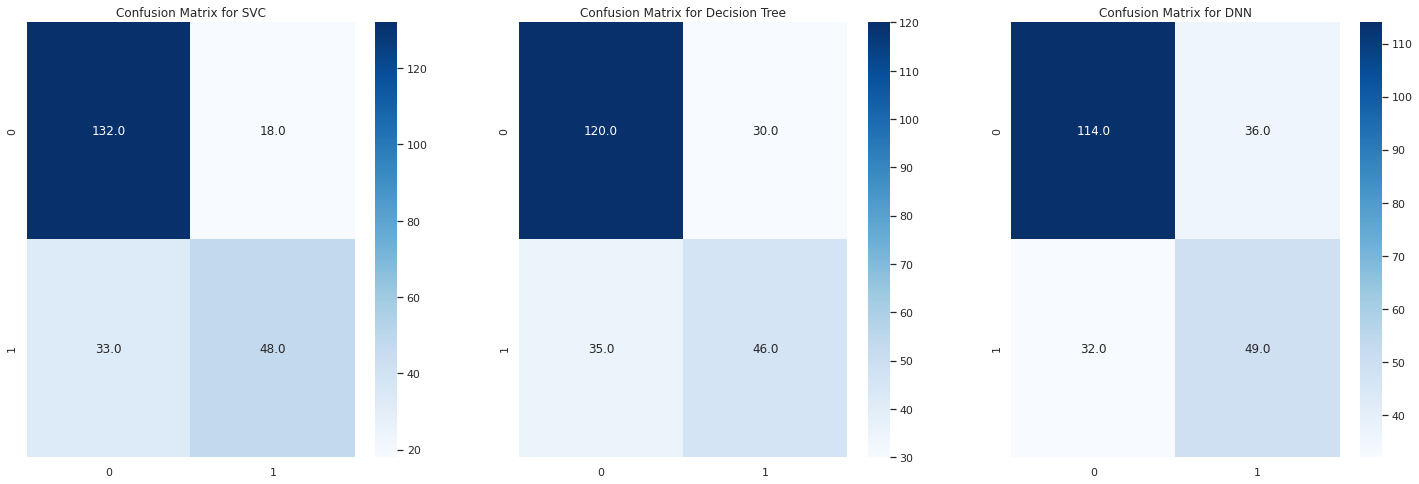

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
plt.figure(figsize=(25,8))

y_pred_svc = svc.predict(X_test_scale)
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.subplot(1,3,1)
sns.heatmap(cm_svc, annot=True, 
            cmap='Blues', fmt='.1f')
plt.title('Confusion Matrix for SVC')

y_pred_decisiontree = decision_tree.predict(X_test_scale)
cm_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
plt.subplot(1,3,2)
sns.heatmap(cm_decisiontree, annot=True, 
            cmap='Blues', fmt='.1f')
plt.title('Confusion Matrix for Decision Tree')

y_pred_dnn = model.predict(X_test_scale)
y_pred_dnn = np.where(y_pred_dnn >= 0.5, 1, 0) 
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.subplot(1,3,3)
sns.heatmap(cm_dnn, annot=True, fmt='.1f', cmap='Blues')
plt.title('Confusion Matrix for DNN')

## Conclusion

According to the Accuracies on the Train Set, SVC model gains the highest score among 3 models (SVC, DecisionTree, DNN) at 0.7792; 0.7186; 0.7056 respectively. So the confusion matrix of SVC model has a better evaluation then the other 2. True Positives (TP): SVC model correctly predicts that patients do have diabetes with 132 patients, the highest of all 3 models.